# <p style='text-align: center;'>Brain Tumour Detection using MRI Image </p>
## <p style='text-align: right;'>S. DHANYA ABHIRAMI <br> 16BCE0965</p>

### Import the required libraries

In [1]:
# cv2 is the Python Version of OpenCV
import cv2
# matplotlib is used for displaying images
import matplotlib.pyplot as plt
%matplotlib inline 
# numpy is used for matrix manipulations 
import numpy as np

## <p style='text-align: center;'>Image Example 1 ( Affected with salt and pepper noise ) </p>

### Read color image

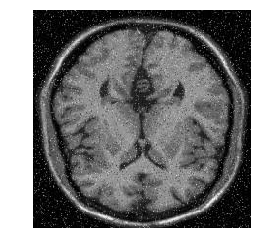

In [2]:
# Read the color image
orig_img = cv2.imread("saltnpepper.jpeg",1) # 1 indicates color image
# OpenCV uses BGR while Matplotlib uses RGB format
# Display the color image with matplotlib
plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Convert to greyscale

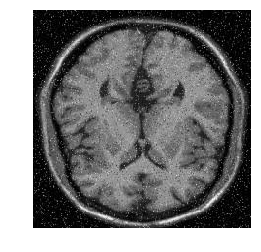

In [3]:
gray_img = cv2.cvtColor( orig_img, cv2.COLOR_BGR2GRAY ) 
plt.imshow(gray_img,cmap='gray')
plt.axis('off')
plt.show()

### Median Filtering

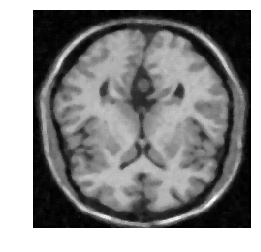

In [4]:
# To remove salt and pepper noise
# Using 5*5 kernel
median_filtered = cv2.medianBlur(gray_img, 5)
plt.imshow(median_filtered,cmap='gray')
plt.axis('off')
plt.show()

### Edge Detection

Gx 
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Gy 
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


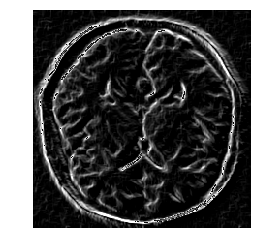

In [5]:
# 3*3 Sobel Filters
Gx= np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
print "Gx \n", Gx
Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
print "Gy \n", Gy
img_sobelx = cv2.Sobel(median_filtered,cv2.CV_8U,1,0,ksize=3)
img_sobely = cv2.Sobel(median_filtered,cv2.CV_8U,0,1,ksize=3)
#del f = Gx + Gy
img_sobel = img_sobelx + img_sobely
plt.imshow(img_sobel,cmap='gray')
plt.axis('off')
plt.show()

### Thresholding

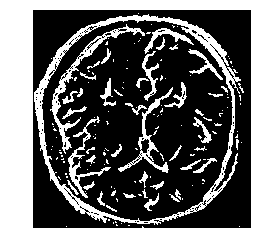

In [6]:
# Set threshold and maxValue
thresh = 60
maxValue = 255
 
# Threshold the pixel values
th, thresh = cv2.threshold(img_sobel, thresh, maxValue, cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')
plt.axis('off')
plt.show()

## <p style='text-align: center;'>Image Example 2 ( Image of Brain with tumour ) </p>

### Read color image

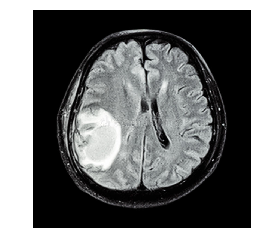

In [7]:
# Read the color image
orig_img = cv2.imread("tumour.jpg",1) # 1 indicates color image
# OpenCV uses BGR while Matplotlib uses RGB format
# Display the color image with matplotlib
plt.imshow(cv2.cvtColor(orig_img, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

### Convert to greyscale

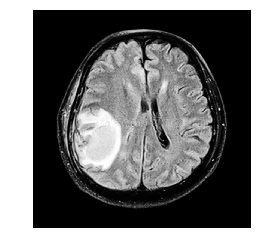

In [8]:
gray_img = cv2.cvtColor( orig_img, cv2.COLOR_BGR2GRAY ) 
plt.imshow(gray_img,cmap='gray')
plt.axis('off')
plt.show()

### Median Filtering

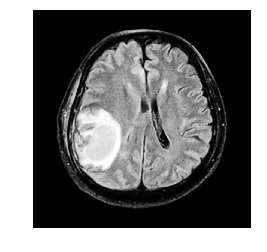

In [9]:
# To remove salt and pepper noise
# Using 5*5 kernel
median_filtered = cv2.medianBlur(gray_img, 5)
plt.imshow(median_filtered,cmap='gray')
plt.axis('off')
plt.show()

### Edge Detection

Gx 
[[-1  0  1]
 [-2  0  2]
 [-1  0  1]]
Gy 
[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]]


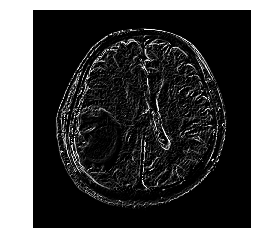

In [10]:
# 3*3 Sobel Filters
Gx= np.array([[-1, 0, 1], [-2, 0, 2], [-1, 0, 1]])
print "Gx \n", Gx
Gy = np.array([[1, 2, 1], [0, 0, 0], [-1, -2, -1]])
print "Gy \n", Gy
img_sobelx = cv2.Sobel(median_filtered,cv2.CV_8U,1,0,ksize=3)
img_sobely = cv2.Sobel(median_filtered,cv2.CV_8U,0,1,ksize=3)
#del f = Gx + Gy
img_sobel = img_sobelx + img_sobely
plt.imshow(img_sobel,cmap='gray')
plt.axis('off')
plt.show()

### Thresholding

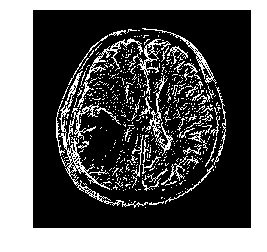

In [11]:
# Set threshold and maxValue
thresh = 40
maxValue = 255
 
# Threshold the pixel values
th, thresh = cv2.threshold(img_sobel, thresh, maxValue, cv2.THRESH_BINARY)
plt.imshow(thresh,cmap='gray')
plt.axis('off')
plt.show()